## Flight Delay Analysis

.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

pd.set_option("display.max_columns", None)

In [2]:
flight_df = pd.read_csv("data/archive/flights_sample_3m.csv")
flight_df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",1010,1237.0,147.0,15.0,1252.0,1328.0,3.0,1110,1331.0,141.0,0.0,NaN,0.0,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0.0,NaN,0.0,109.0,89.0,58.0,399.0,NaN,NaN,NaN,NaN,NaN
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",1643,1637.0,-6.0,22.0,1659.0,1927.0,41.0,1945,2008.0,23.0,0.0,NaN,0.0,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0.0,NaN,0.0,227.0,219.0,200.0,1379.0,NaN,NaN,NaN,NaN,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116.0,-9.0,19.0,2135.0,2353.0,3.0,2355,2356.0,1.0,0.0,NaN,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN


In [3]:
flight_df.sample(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
790779,2019-02-21,JetBlue Airways,JetBlue Airways: B6,B6,20409,485,ROC,"Rochester, NY",JFK,"New York, NY",1303,1306.0,3.0,8.0,1314.0,1408.0,5.0,1422,1413.0,-9.0,0.0,NaN,0.0,79.0,67.0,54.0,264.0,NaN,NaN,NaN,NaN,NaN
1943491,2023-08-10,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2158,CLT,"Charlotte, NC",MSY,"New Orleans, LA",822,946.0,84.0,33.0,1019.0,1051.0,9.0,915,1100.0,105.0,0.0,NaN,0.0,113.0,134.0,92.0,651.0,0.0,44.0,21.0,0.0,40.0
1363726,2019-02-27,PSA Airlines Inc.,PSA Airlines Inc.: OH,OH,20397,5394,PHL,"Philadelphia, PA",GSP,"Greer, SC",1755,1744.0,-11.0,14.0,1758.0,1927.0,5.0,1946,1932.0,-14.0,0.0,NaN,0.0,111.0,108.0,89.0,515.0,NaN,NaN,NaN,NaN,NaN
1174535,2019-11-27,JetBlue Airways,JetBlue Airways: B6,B6,20409,2901,JFK,"New York, NY",FLL,"Fort Lauderdale, FL",950,941.0,-9.0,24.0,1005.0,1238.0,13.0,1258,1251.0,-7.0,0.0,NaN,0.0,188.0,190.0,153.0,1069.0,NaN,NaN,NaN,NaN,NaN
1732736,2021-07-29,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,962,TPA,"Tampa, FL",MSY,"New Orleans, LA",1705,1719.0,14.0,11.0,1730.0,1743.0,4.0,1740,1747.0,7.0,0.0,NaN,0.0,95.0,88.0,73.0,488.0,NaN,NaN,NaN,NaN,NaN
121929,2022-08-13,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3522,PHX,"Phoenix, AZ",LAX,"Los Angeles, CA",1015,1018.0,3.0,17.0,1035.0,1133.0,7.0,1149,1140.0,-9.0,0.0,NaN,0.0,94.0,82.0,58.0,370.0,NaN,NaN,NaN,NaN,NaN
21842,2022-03-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,704,OAK,"Oakland, CA",PDX,"Portland, OR",750,753.0,3.0,11.0,804.0,931.0,2.0,930,933.0,3.0,0.0,NaN,0.0,100.0,100.0,87.0,543.0,NaN,NaN,NaN,NaN,NaN
1063625,2022-10-03,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2448,DTW,"Detroit, MI",SAT,"San Antonio, TX",1955,1953.0,-2.0,13.0,2006.0,2140.0,3.0,2202,2143.0,-19.0,0.0,NaN,0.0,187.0,170.0,154.0,1214.0,NaN,NaN,NaN,NaN,NaN
783020,2023-02-11,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,274,FLL,"Fort Lauderdale, FL",MKE,"Milwaukee, WI",1705,1704.0,-1.0,10.0,1714.0,1851.0,5.0,1925,1856.0,-29.0,0.0,NaN,0.0,200.0,172.0,157.0,1243.0,NaN,NaN,NaN,NaN,NaN
1223943,2019-06-17,Mesa Airlines Inc.,Mesa Airlines Inc.: YV,YV,20378,6010,MSY,"New Orleans, LA",IAD,"Washington, DC",1230,1225.0,-5.0,11.0,1236.0,1545.0,5.0,1556,1550.0,-6.0,0.0,NaN,0.0,146.0,145.0,129.0,955.0,NaN,NaN,NaN,NaN,NaN


In [4]:
flight_df.tail(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2999990,2023-07-26,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4126,DTW,"Detroit, MI",MSN,"Madison, WI",825,824.0,-1.0,32.0,856.0,851.0,5.0,843,856.0,13.0,0.0,NaN,0.0,78.0,92.0,55.0,311.0,NaN,NaN,NaN,NaN,NaN
2999991,2021-12-03,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1146,MSP,"Minneapolis, MN",SNA,"Santa Ana, CA",1825,1833.0,8.0,23.0,1856.0,2015.0,7.0,2030,2022.0,-8.0,0.0,NaN,0.0,245.0,229.0,199.0,1522.0,NaN,NaN,NaN,NaN,NaN
2999992,2019-01-13,JetBlue Airways,JetBlue Airways: B6,B6,20409,1668,CHS,"Charleston, SC",BOS,"Boston, MA",1258,1245.0,-13.0,15.0,1300.0,1438.0,4.0,1510,1442.0,-28.0,0.0,NaN,0.0,132.0,117.0,98.0,818.0,NaN,NaN,NaN,NaN,NaN
2999993,2019-12-23,Allegiant Air,Allegiant Air: G4,G4,20368,1899,SRQ,"Sarasota/Bradenton, FL",IND,"Indianapolis, IN",907,905.0,-2.0,11.0,916.0,1106.0,9.0,1125,1115.0,-10.0,0.0,NaN,0.0,138.0,130.0,110.0,876.0,NaN,NaN,NaN,NaN,NaN
2999994,2020-08-31,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1408,FLL,"Fort Lauderdale, FL",LGA,"New York, NY",700,653.0,-7.0,16.0,709.0,927.0,6.0,944,933.0,-11.0,0.0,NaN,0.0,164.0,160.0,138.0,1076.0,NaN,NaN,NaN,NaN,NaN
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0.0,NaN,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0.0,NaN,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,729,805.0,36.0,0.0,NaN,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,19.0,1614.0,1704.0,8.0,1728,1712.0,-16.0,0.0,NaN,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN
2999999,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2823,LGB,"Long Beach, CA",SJC,"San Jose, CA",730,727.0,-3.0,9.0,736.0,828.0,2.0,840,830.0,-10.0,0.0,NaN,0.0,70.0,63.0,52.0,324.0,NaN,NaN,NaN,NaN,NaN


In [5]:
flight_df.shape

(3000000, 32)

In [6]:
flight_df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [7]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

### Data Cleaning and Wrangling

#### 1. Checking for completeness

In [8]:
# calculating percentages of missing values
 
def missing_values_percentages(df: pd.DataFrame):
    missing_percent = (df.isna().sum() /len(df)) * 100
    missing_df = pd.DataFrame({'Column': df.columns, "Missing (%)": missing_percent})
    missing_df = missing_df[missing_df["Missing (%)"] > 0].sort_values(by='Missing (%)', ascending=False)
    return missing_df


In [9]:
missing_values_percentages(flight_df)

,Column,Missing (%)
CANCELLATION_CODE,CANCELLATION_CODE,97.362000
DELAY_DUE_CARRIER,DELAY_DUE_CARRIER,82.204567
DELAY_DUE_SECURITY,DELAY_DUE_SECURITY,82.204567
DELAY_DUE_NAS,DELAY_DUE_NAS,82.204567
DELAY_DUE_WEATHER,DELAY_DUE_WEATHER,82.204567
DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_LATE_AIRCRAFT,82.204567
ARR_DELAY,ARR_DELAY,2.873267
ELAPSED_TIME,ELAPSED_TIME,2.873267
AIR_TIME,AIR_TIME,2.873267
TAXI_IN,TAXI_IN,2.664800


In [10]:
# dealing with missing values 

# Replace missing delay causes with 0 as absence of data implies no delay due to that cause

delay_columns = [
        'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
    ]

flight_df[delay_columns] = flight_df[delay_columns].fillna(0)

In [11]:
# Impute CRS_ELAPSED_TIME with median

flight_df['CRS_ELAPSED_TIME'] = flight_df['CRS_ELAPSED_TIME'].fillna(flight_df['CRS_ELAPSED_TIME'].median())

In [12]:
# Impute ELAPSED_TIME and AIR_TIME for non-canceled flights with group median

flight_df['ELAPSED_TIME'] = flight_df.groupby('AIRLINE_CODE')['ELAPSED_TIME'].transform(lambda x: x.fillna(x.median()))
flight_df['AIR_TIME'] = flight_df.groupby('AIRLINE_CODE')['AIR_TIME'].transform(lambda x: x.fillna(x.median()))

In [17]:
# Impute ARR_DELAY for non-canceled flights
flight_df['ARR_DELAY'] = flight_df.groupby('AIRLINE_CODE')['ARR_DELAY'].transform(lambda x: x.fillna(x.median()))

# Impute WHEELS_ON and TAXI_IN
flight_df['WHEELS_ON'] = flight_df['WHEELS_ON'].fillna(flight_df['CRS_ARR_TIME'] - flight_df['TAXI_IN'].median())
flight_df['TAXI_IN'] = flight_df['TAXI_IN'].fillna(flight_df['TAXI_IN'].median())

# Impute ARR_TIME
flight_df['ARR_TIME'] = flight_df['ARR_TIME'].fillna(flight_df['WHEELS_ON'] + flight_df['TAXI_IN'].median())

# Impute TAXI_OUT and WHEELS_OFF
flight_df['TAXI_OUT'] = flight_df.groupby('ORIGIN')['TAXI_OUT'].transform(lambda x: x.fillna(x.median()))
flight_df['WHEELS_OFF'] = flight_df['WHEELS_OFF'].fillna(flight_df['DEP_TIME'] + flight_df['TAXI_OUT'].median())

# Impute DEP_DELAY and DEP_TIME
flight_df['DEP_DELAY'] = flight_df.groupby('AIRLINE_CODE')['DEP_DELAY'].transform(lambda x: x.fillna(x.median()))
flight_df['DEP_TIME'] = flight_df["DEP_TIME"].fillna(flight_df['CRS_DEP_TIME'] + flight_df['DEP_DELAY'])

In [14]:
# Drop CANCELLATION_CODE as our focus is on delay analysis and the column is missing 97% of its values

flight_df = flight_df.drop(columns=['CANCELLATION_CODE'], errors='ignore')

In [18]:
missing_values_percentages(flight_df)

,Column,Missing (%)


In [19]:
flight_df.isna().sum()

FL_DATE                    0
AIRLINE                    0
AIRLINE_DOT                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64

#### 2. Checking for consistency

In [20]:
# checking for duplicated values 
flight_df.duplicated().sum()

0

The Dataset contains no duplicated values

#### 3. Checking for Uniformity

In [21]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  DIVERTED

In [22]:
# Handling uniformity of data types 
# Convert FL_DATE to datetime
flight_df['FL_DATE'] = pd.to_datetime(flight_df['FL_DATE'], format='%Y-%m-%d')

In [23]:
# Convert object columns to category
categorical_columns = ['AIRLINE', 'AIRLINE_CODE', 'AIRLINE_DOT','ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']
for col in categorical_columns:
    flight_df[col] = flight_df[col].astype('category')

In [24]:
# Convert time-related columns to four-digit integers (hhmm)
time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME']
for col in time_columns:
    flight_df[col] = flight_df[col].astype('Int64') 

In [25]:
# Convert binary flags to boolean
flight_df['CANCELLED'] = flight_df['CANCELLED'].astype(bool)
flight_df['DIVERTED'] = flight_df['DIVERTED'].astype(bool)

In [26]:
# Convert all column names to lowercase
flight_df.columns = flight_df.columns.str.lower()

In [27]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 31 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   fl_date                  datetime64[ns]
 1   airline                  category      
 2   airline_dot              category      
 3   airline_code             category      
 4   dot_code                 int64         
 5   fl_number                int64         
 6   origin                   category      
 7   origin_city              category      
 8   dest                     category      
 9   dest_city                category      
 10  crs_dep_time             Int64         
 11  dep_time                 Int64         
 12  dep_delay                float64       
 13  taxi_out                 float64       
 14  wheels_off               Int64         
 15  wheels_on                Int64         
 16  taxi_in                  float64       
 17  crs_arr_time             In

#### 4. Checking for Validity

In [29]:
flight_df.describe()

,dot_code,fl_number,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.330505e+03,9.806089e+00,1.658907e+01,1.352930e+03,1.463663e+03,7.634241e+00,1.490561e+03,1.467728e+03,3.954262e+00,1.422757e+02,1.362084e+02,1.119000e+02,8.093616e+02,4.405987e+00,7.091943e-01,2.342720e+00,2.596900e-02,4.532725e+00
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993392e+02,4.864984e+01,9.089883e+00,5.008606e+02,5.274387e+02,6.191446e+00,5.115476e+02,5.319208e+02,5.046670e+01,7.155653e+01,7.082580e+01,6.892730e+01,5.878939e+02,3.172305e+01,1.375707e+01,1.486748e+01,1.512105e+00,2.546245e+01
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,-5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,1.053000e+03,-1.500000e+01,9.000000e+01,8.500000e+01,6.200000e+01,3.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.502000e+03,6.000000e+00,1.516000e+03,1.506000e+03,-7.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.753000e+03,1.909000e+03,9.000000e+00,1.919000e+03,1.914000e+03,6.000000e+00,1.720000e+02,1.660000e+02,1.410000e+02,1.046000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,2.400000e+03,2.934000e+03,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2.934000e+03,1.653000e+03,1.741000e+03,1.185000e+03,2.557000e+03


In [30]:
def check_outliers(df):
    # List to store outlier details for each column
    outlier_data = []

    # Loop through numeric columns
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Compute Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Compute outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_percentage = (outlier_count / df.shape[0]) * 100

        # Append details to the list
        outlier_data.append({
            'column': col,
            'outlier_count': outlier_count,
            'outlier_percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

    # Convert list to DataFrame
    outlier_df = pd.DataFrame(outlier_data)
    return outlier_df

In [31]:
# Apply the function
check_outliers(flight_df)

,column,outlier_count,outlier_percentage,lower_bound,upper_bound
0,dot_code,0,0.000000,18923.0,21235.0
1,fl_number,140,0.004667,-3068.0,7916.0
2,crs_dep_time,0,0.000000,-307.5,2952.5
3,dep_time,0,0.000000,-318.5,2973.5
4,dep_delay,392850,13.095000,-24.0,24.0
5,taxi_out,166368,5.545600,-1.0,31.0
6,wheels_off,0,0.000000,-302.0,2986.0
7,wheels_on,0,0.000000,-241.0,3199.0
8,taxi_in,179309,5.976967,-3.5,16.5
9,crs_arr_time,0,0.000000,-111.0,3137.0


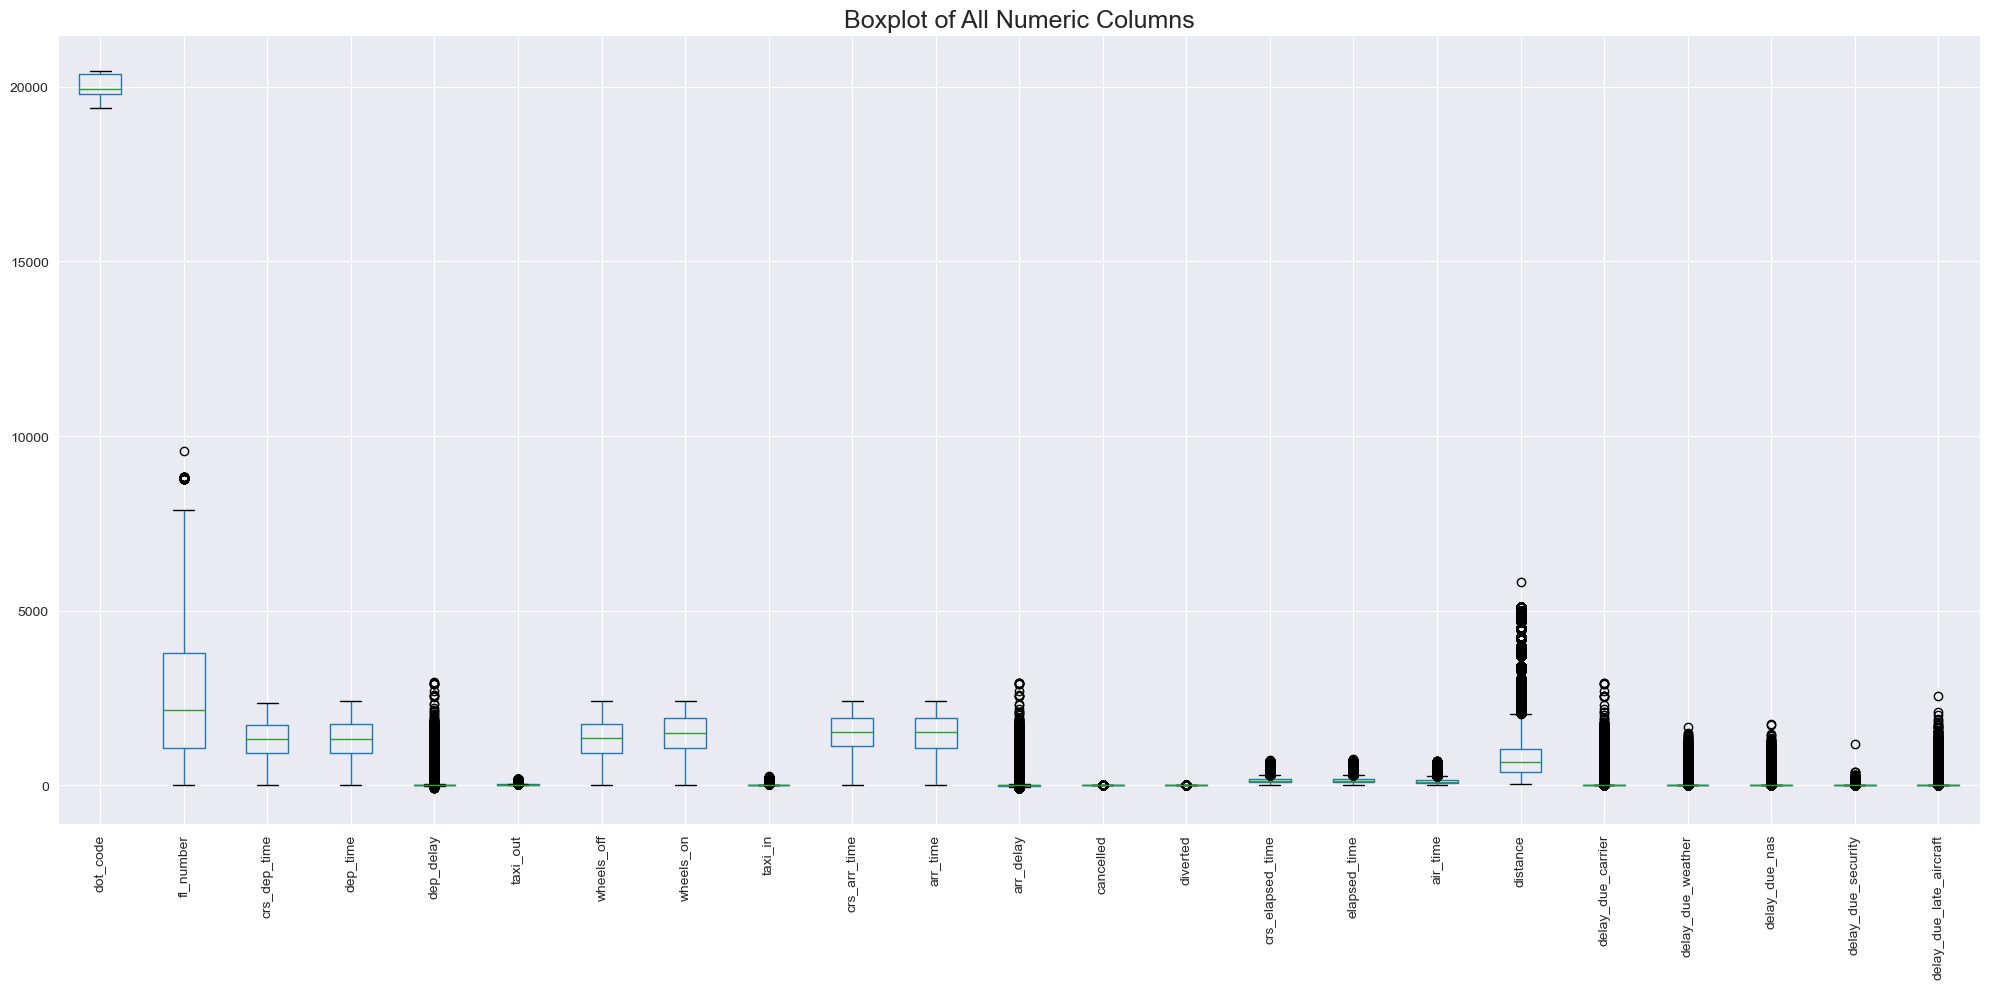

In [32]:
plt.figure(figsize=(20, 10))

flight_df.boxplot()

plt.title("Boxplot of All Numeric Columns", fontsize=18)
plt.xticks(rotation=90, fontsize=10)  
plt.grid(True)  
plt.tight_layout() 

plt.show()

In [33]:
def remove_outliers(df):
    # Create a copy of the dataframe to avoid modifying the original
    df_no_outliers = df.copy()

    # Loop through each column to calculate IQR and detect outliers
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with NaN
        df_no_outliers[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

    return df_no_outliers

In [34]:
# Apply the function to remove outliers
flight_df = remove_outliers(flight_df)
flight_df

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562.0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149.0,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114,-6.0,9.0,2123,2232,NaN,2315,2310,-5.0,False,False,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295.0,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608,-1.0,27.0,1635,1844,9.0,1829,1853,24.0,False,False,260.0,285.0,249.0,1589.0,0.0,0.0,NaN,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407.0,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522.0,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740,-2.0,10.0,1750,1845,6.0,1907,1851,-16.0,False,False,85.0,71.0,55.0,328.0,0.0,0.0,0.0,0.0,0.0
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535.0,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254,-6.0,10.0,1304,1514,5.0,1556,1519,-37.0,False,False,176.0,145.0,130.0,977.0,0.0,0.0,0.0,0.0,0.0
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745.0,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615,NaN,16.0,631,759,6.0,729,805,36.0,False,False,55.0,50.0,28.0,151.0,0.0,NaN,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134.0,BOS,"Boston, MA",LGA,"New York, NY",1600,1555,-5.0,19.0,1614,1704,8.0,1728,1712,-16.0,False,False,88.0,77.0,50.0,184.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
flight_df.isna().sum()

In [38]:
flight_df.columns

Index(['fl_date', 'airline', 'airline_dot', 'airline_code', 'dot_code',
       'fl_number', 'origin', 'origin_city', 'dest', 'dest_city',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time',
       'distance', 'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft'],
      dtype='object')

In [39]:
# Create a delay column: True if delayed, False otherwise

flight_df['target'] = (flight_df['arr_delay'] > 0) | (flight_df['dep_delay'] > 0)

In [40]:
flight_df.head()

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562.0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,False
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149.0,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123,2232,NaN,2315,2310,-5.0,False,False,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,False
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,960.0,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,True
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295.0,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635,1844,9.0,1829,1853,24.0,False,False,260.0,285.0,249.0,1589.0,0.0,0.0,NaN,0.0,0.0,True
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407.0,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,False


In [41]:
flight_df.isna().sum()

fl_date                         0
airline                         0
airline_dot                     0
airline_code                    0
dot_code                        0
fl_number                     140
origin                          0
origin_city                     0
dest                            0
dest_city                       0
crs_dep_time                    0
dep_time                      410
dep_delay                  392850
taxi_out                   166368
wheels_off                      0
wheels_on                       0
taxi_in                    179309
crs_arr_time                    0
arr_time                        0
arr_delay                  285198
cancelled                       0
diverted                        0
crs_elapsed_time           154277
elapsed_time               152402
air_time                   155582
distance                   168407
delay_due_carrier          296951
delay_due_weather           31428
delay_due_nas              256477
delay_due_secu

In [ ]:
# Save the cleaned dataset (without outliers) to a CSV file

flight_df.to_csv('cleaned_flight_data.csv', index=False)

### Explanatory Data Analysis

#### 1. Univariate Data Analysis

<Figure size 1400x800 with 0 Axes>

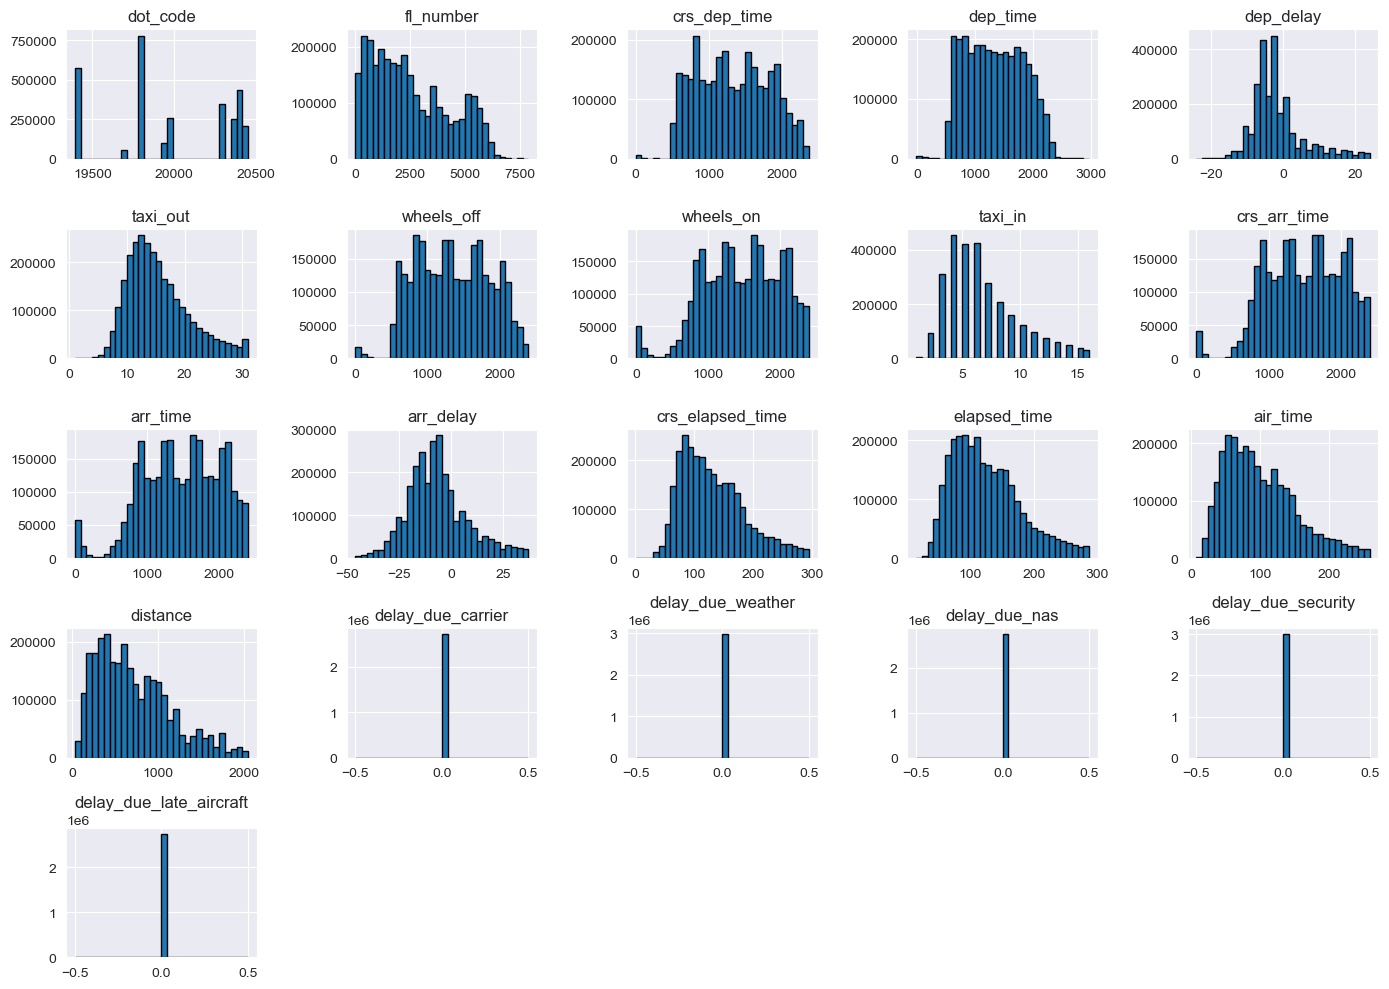

In [ ]:
# Set the plot size for readability
plt.figure(figsize=(14, 8))

# Plot histograms for each numerical column
flight_df_cleaned.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(14, 10), layout=(5, 5), edgecolor='black')
plt.tight_layout()
plt.show()


In [ ]:
# plotting the target variable
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=flight_df_cleaned['target'], ax=ax)
plt.title("Distribution of target variable", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Target", fontsize=14)
plt.show()

In [ ]:
# plotting the lc5 variable
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=flight_df_cleaned['lc5 '], ax=ax)
plt.title("Distribution of lc5 variable", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("lc5", fontsize=14)
plt.show()

In [ ]:
# plotting the chd5 variable
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=flight_df_cleaned['chd5 '], ax=ax)
plt.title("Distribution of chd5 variable", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("chd5", fontsize=14)
plt.show()

In [ ]:
# plotting the chd5 variable
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=flight_df_cleaned['gender'], ax=ax)
plt.title("Distribution of gender variable", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.show()

#### 2. Bivariate Data Analysis

#### 3. Multivariate Data Analysis

### Data Preparation

#### 1. Dealing with categorical data

#### 2. Scaling Data

#### 3. Dealing with Class Imbalance

#### 4. Splitting the Dataset into train, test and val

### Model Building and Evaluation

#### 1. Baseline Logistic regression

In [ ]:
# logistic regression


#### 2. Random Forest 

In [ ]:
# random forest 


#### 3. Gradient Boost

In [ ]:
# gradient boost


#### 4. XG Boost

In [ ]:
# xg boost 


### Final Model test using the test Data

In [ ]:
# final model test 


### Conclusion